# Titanic Model
<hr>

## Imports

#### Import `pandas` and `numpy`  for Data Manipulation

In [1]:
import pandas as pd
import numpy as np

<br>

#### import `matplotlib` and `seaborn` for data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('seaborn-muted')

<br>

#### Import `SkLearn` functions to model Data

In [3]:
# To Split Dataset
from sklearn.model_selection import train_test_split


# Import Model
from sklearn.ensemble import GradientBoostingClassifier


# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<br>

#### Import `pickle` to save finished model

In [4]:
import pickle

<br>
<br>
<br>
<br>
<hr>

## Load Data

In [5]:
train = pd.read_csv('./data/titanic.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<br>
<br>
<br>
<br>

# 1. Explatory Data Analysis
<hr>

## Women and Children?

### `Gender` vs. `Survived`

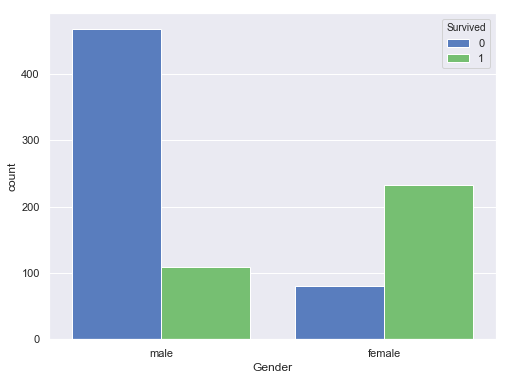

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.countplot(train['Gender'], hue=train['Survived'], ax=ax)
plt.show()

### `Age` and `Gender` VS. `Survived`

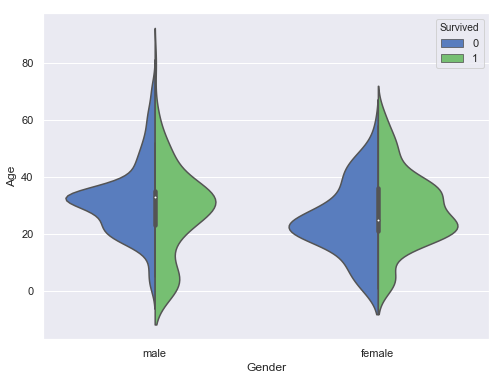

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.violinplot("Gender", "Age", hue = "Survived", data = train, split = True)

plt.show()

<br>
<br>
<br>
<br>

# 2. Feature Engineering and Preprocessing
<hr>

## Where You travelling Alone ?

In [9]:
train['FamilySize'] = train['SibSp'] + train['ParCh'] + 1

In [10]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, "IsAlone"] = 1

<br>

### `IsAlone` column is appended to the end of the dataframe

In [16]:
train.head()

,Survived,Age,IsAlone,IsFemale
0,0,22.0,0,0
1,1,38.0,0,1
2,1,26.0,1,1
3,1,35.0,0,1
4,0,35.0,1,0


<br>

## Drop All Columns except for `Age`, `Gender`, and `IsAlone`

In [18]:
train = train.drop(['PassengerId', 'Pclass', 'Name', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Title','FamilySize', 'Embarked'], axis=1)

<br>

## Label Encoding
Most machine learning models cannot interpret string values directly, we must encode them into numerical values!

### Convert `Gender` into a binary column: `IsFemale`

In [21]:
train['IsFemale'] = train['Gender'].replace(['male','female'],[0,1])

In [22]:
train = train.drop(['Gender'],axis=1)

In [24]:
train.head()

,Survived,Age,IsAlone,IsFemale
0,0,22.0,0,0
1,1,38.0,0,1
2,1,26.0,1,1
3,1,35.0,0,1
4,0,35.0,1,0


<br>
<br>
<br>
<br>

# 3. Create Model
<hr>

## A. Split Dataset into `train` and `test`
**We split the dataset into two sets:**
* `X_train` and `y_train`: Will be passed into the model to learn the patterns in the data
* `X_test` and `y_test`: Will be used to test the validity of the model's predictions.

In [25]:
features = train.drop(['Survived'], axis=1)
target = train['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.90, random_state=100)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Check Dimensions

In [27]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)

X_train: (801, 3) y_train: (801,)


In [28]:
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_test: (90, 3) y_test: (90,)


<br>

## B. Train Model

The parameters that I passed in are called `hyperparameters`, these were "discovered" through a process called cross-validation, which can be applied with the `SciKit_Learn` function `GridSearchCV`

In [29]:
model = GradientBoostingClassifier(learning_rate=0.02, n_estimators=200, max_features=None)

In [30]:
model.fit(X_train.values, y_train.values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## C. Make Predictions on X_test

In [31]:
predictions = model.predict(X_test)

<br>
<br>
<br>
<br>

# 4. Evaluate Model Performance 

<hr>

### A. Check `accuracy` of `predictions` by comparing to  `y_test`

In [32]:
accuracy_score(y_test, predictions)

0.7333333333333333

### B. Check `confusion_matrix` of `predictions`

In [33]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
#     prep work
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    
#     make Heatmap and set custom tick marks
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
#     Set plot labels
    ax.set_ylabel('True label', fontsize=fontsize*1.5)
    ax.set_xlabel('Predicted label',fontsize=fontsize*1.5)
    
    return fig

In [34]:
cm = confusion_matrix(y_test,predictions)
labels = ["Perished","Survived"]

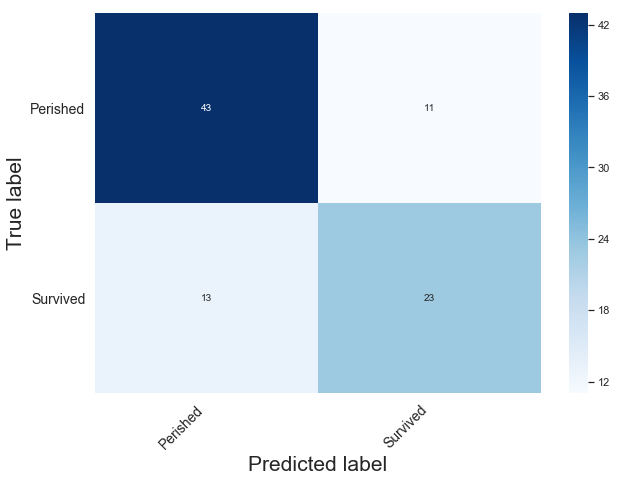

In [35]:
_ = print_confusion_matrix(confusion_matrix = cm, class_names=labels)

<br>
<br>
<br>
<br>

# 5. Export Model
<hr>

In [36]:
from sklearn.externals import joblib
joblib.dump(model, './titanic_grad_boost.joblib') 

['./titanic_grad_boost.joblib']